#Problem Statement: Bank Churn Prediction
-------------------------------------------------------------------------------------------------------------------------

Objective:

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not.

Context:

Businesses like banks which provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

Data Description:

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Link to the Kaggle project site: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Points Distribution:

The points distribution for this case is as follows:

Read the dataset
Drop the columns which are unique for all users like IDs (5points)
Distinguish the features and target variable(5points)
Divide the data set into training and test sets (5points)
Normalize the train and test data (10points)
Initialize & build the model. Identify the points of improvement and implement the same. Note that you need to demonstrate at least two models(the original and the improved one) and highlight the differences to complete this point. You can also demonstrate more models. (20points)
Predict the results using 0.5 as a threshold. Note that you need to first predict the probability and then predict classes using the given threshold (10points)
Print the Accuracy score and confusion matrix (5points)

In [244]:
!pip install tensorflow==2.3.0

In [245]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [246]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [247]:
from google.colab import drive

In [248]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [249]:
project_path = '/content/drive/My Drive/Colab Notebooks/'

In [250]:
dataset_file = project_path + 'bank.csv'

In [251]:
data = pd.read_csv(dataset_file)

In [252]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# From reviewing the data, customerid, surname are unique and wont contribute towards data analysis and will be dropped

In [262]:
data=data.drop("CustomerId",axis=1)

In [263]:
data=data.drop("Surname",axis=1)

In [264]:
data.head(20)

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


Distinguish the features and target variables
The bank customer are from three countries - France, Spain and germany with a good mix of male and female customers. THe exited column is the target column which indicates whether customer has left the bank or not.. the churn...

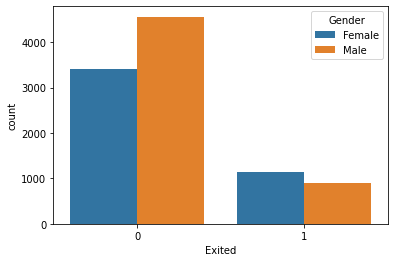

In [265]:
 import seaborn as sns
 sns.countplot(x="Exited", hue="Gender", data=data)

The plot indicates that more men are existing customers vs females and females have a slightly higher propensity to exit the bank

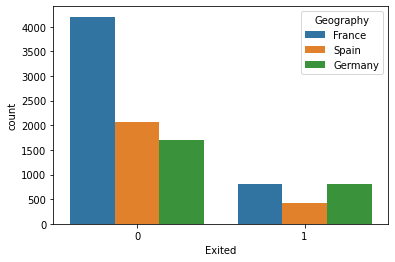

In [266]:
sns.countplot(x="Exited", hue="Geography", data=data)

France has more customers than spain and germany. France and germany customers have more exits than spain. Based on the analysis, the target column is exit which can be used to predict the churn rate and feature columns form the rest of the data set including credit score, gender, geogrpahy, salary and other parameters

In [267]:
#Split the data into features and targets
x = data.iloc[:, 0:10]
y = data.iloc[:,11]



In [268]:
#creating dummy variables for the categorical features (Geography and Gender)
x = pd.get_dummies(x)
x



,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,1,1,1,0,0,1,0
1,2,608,41,1,83807.86,1,0,1,0,0,1,1,0
2,3,502,42,8,159660.80,3,1,0,1,0,0,1,0
3,4,699,39,1,0.00,2,0,0,1,0,0,1,0
4,5,850,43,2,125510.82,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,39,5,0.00,2,1,0,1,0,0,0,1
9996,9997,516,35,10,57369.61,1,1,1,1,0,0,0,1
9997,9998,709,36,7,0.00,1,0,1,1,0,0,1,0
9998,9999,772,42,3,75075.31,2,1,0,0,1,0,0,1


In [269]:
#dropping one of the geography columns as data can be inferred from the other two columns
x=x.drop("Geography_Spain",axis=1)

In [270]:
# dropping one of the gender columns as data can be inferred from the other column
x=x.drop("Gender_Male",axis=1)

In [271]:
x

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Gender_Female
0,1,619,42,2,0.00,1,1,1,1,0,1
1,2,608,41,1,83807.86,1,0,1,0,0,1
2,3,502,42,8,159660.80,3,1,0,1,0,1
3,4,699,39,1,0.00,2,0,0,1,0,1
4,5,850,43,2,125510.82,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,39,5,0.00,2,1,0,1,0,0
9996,9997,516,35,10,57369.61,1,1,1,1,0,0
9997,9998,709,36,7,0.00,1,0,1,1,0,1
9998,9999,772,42,3,75075.31,2,1,0,0,1,0


In [272]:
#Split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7000, 11) (3000, 11) (7000,) (3000,)


In [273]:
# Normalize / Scale the data
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


In [274]:
import keras
from keras.models import Sequential
from keras.layers import Dense


First ANN Model with 1 Hidden layer only

In [275]:
#Initialise Model
Model1=Sequential()

In [276]:
#ADD input layer and 1st hidden layer
Model1.add(Dense(input_dim=11, units=5,activation="sigmoid",kernel_initializer="uniform"))


In [277]:
#added the output layer
Model1.add(Dense(units=1,activation="sigmoid",kernel_initializer="uniform"))

In [278]:
#compile the model
Model1.compile(optimizer="sgd",loss="binary_crossentropy")

In [279]:
# Fitting the Model to the Training set
var1 = Model1.fit(x_train, y_train, batch_size = 10, epochs = 100)



Epoch 1/100
700/700 [==============================] - 1s 873us/step - loss: 0.5310
Epoch 2/100
700/700 [==============================] - 1s 874us/step - loss: 0.4978
Epoch 3/100
700/700 [==============================] - 1s 828us/step - loss: 0.4917
Epoch 4/100
700/700 [==============================] - 1s 824us/step - loss: 0.4853
Epoch 5/100
700/700 [==============================] - 1s 835us/step - loss: 0.4784
Epoch 6/100
700/700 [==============================] - 1s 814us/step - loss: 0.4712
Epoch 7/100
700/700 [==============================] - 1s 834us/step - loss: 0.4643
Epoch 8/100
700/700 [==============================] - 1s 852us/step - loss: 0.4576
Epoch 9/100
700/700 [==============================] - 1s 845us/step - loss: 0.4517
Epoch 10/100
700/700 [==============================] - 1s 842us/step - loss: 0.4465
Epoch 11/100
700/700 [==============================] - 1s 828us/step - loss: 0.4422
Epoch 12/100
700/700 [==============================] - 1s 829us/step - lo

In [280]:
# Predicting the Test set results
Model1.predict(x_test)[:25]


array([[0.21331087],
       [0.34628648],
       [0.18801102],
       [0.07703832],
       [0.15757227],
       [0.63785994],
       [0.04276767],
       [0.04532385],
       [0.3262357 ],
       [0.6781127 ],
       [0.09488094],
       [0.14112806],
       [0.2941992 ],
       [0.14115891],
       [0.49219483],
       [0.43076077],
       [0.29623586],
       [0.30479258],
       [0.05320573],
       [0.17483583],
       [0.4080093 ],
       [0.03673723],
       [0.14020735],
       [0.13666213],
       [0.03607062]], dtype=float32)

In [281]:
y_pred_Model1 = Model1.predict(x_test)
y_pred_Model1a = (y_pred > 0.5)
y_pred_Model1a

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [282]:
print('First Model Test Resuls with 0.5 Threshold \n')
Test_Results_First_Model=pd.DataFrame(data=[accuracy_score(y_test, y_pred_Model1a), 
                   recall_score(y_test, y_pred_Model1a), 
                   precision_score(y_test, y_pred_Model1a),
                   f1_score(y_test, y_pred_Model1a)], columns=['First ANN Model'],
             index=["accuracy", "recall", "precision", "f1_score"])
print(Test_Results_First_Model)

First Model Test Resuls with 0.5 Threshold 

           First ANN Model
accuracy          0.840333
recall            0.338164
precision         0.755396
f1_score          0.467186


In the First Model Accuracy is high, recal is low, precision is high and F1 score is lower


In [283]:
from sklearn.metrics import accuracy_score,confusion_matrix
conf_Model1=confusion_matrix(y_pred_Model1a,y_test)
print(conf_Model1)

[[2311  411]
 [  68  210]]


In [284]:
# Second ANN Model with Activation Function:relu and second hidden layer
Model2=Sequential()
Model2.add(Dense(input_dim=11, units=6,activation="relu",kernel_initializer="he_uniform"))
Model2.add(Dense(units=5,activation="relu",kernel_initializer="he_uniform"))
Model2.add(Dense(units=1,activation="sigmoid",kernel_initializer="uniform"))
Model2.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])


Model2_ANN=Model2.fit(x_train,y_train,batch_size=50,epochs=100)




Epoch 1/100
140/140 [==============================] - 0s 1ms/step - loss: 0.6054 - accuracy: 0.7767
Epoch 2/100
140/140 [==============================] - 0s 975us/step - loss: 0.4939 - accuracy: 0.7977
Epoch 3/100
140/140 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.7977
Epoch 4/100
140/140 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.7977
Epoch 5/100
140/140 [==============================] - 0s 1ms/step - loss: 0.4441 - accuracy: 0.7977
Epoch 6/100
140/140 [==============================] - 0s 953us/step - loss: 0.4379 - accuracy: 0.7977
Epoch 7/100
140/140 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.7977
Epoch 8/100
140/140 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.7977
Epoch 9/100
140/140 [==============================] - 0s 1ms/step - loss: 0.4250 - accuracy: 0.7977
Epoch 10/100
140/140 [==============================] - 0s 977us/step - loss: 0.4222 - 

In [285]:
# Predicting the Test set results
Model2.predict(x_test)[:25]


array([[0.2974329 ],
       [0.27111113],
       [0.14610344],
       [0.06800026],
       [0.0394339 ],
       [0.9374454 ],
       [0.02525094],
       [0.10437009],
       [0.22065836],
       [0.89079154],
       [0.02399433],
       [0.2869738 ],
       [0.37680602],
       [0.28067482],
       [0.5609281 ],
       [0.41605523],
       [0.10437056],
       [0.15755647],
       [0.11201096],
       [0.09790084],
       [0.5350207 ],
       [0.00342909],
       [0.05984315],
       [0.07353589],
       [0.00305769]], dtype=float32)

In [286]:
y_pred_Model2=Model2.predict(x_test)
y_pred_Model2a=(y_pred_Model2>0.5)
y_pred_Model2a

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [287]:
print('Second Model Test Resuls with 0.5 Threshold \n')
Test_Results_Second_Model=pd.DataFrame(data=[accuracy_score(y_test, y_pred_Model2a), 
                   recall_score(y_test, y_pred_Model2a), 
                   precision_score(y_test, y_pred_Model2a),
                   f1_score(y_test, y_pred_Model2a)], columns=['Second ANN Model'],
             index=["accuracy", "recall", "precision", "f1_score"])
print(Test_Results_Second_Model)

Second Model Test Resuls with 0.5 Threshold 

           Second ANN Model
accuracy           0.860000
recall             0.495974
precision          0.742169
f1_score           0.594595


In the second model, accuracy is slightly higher, recall is better, precisio is similar and F1 score is higher


In [288]:
from sklearn.metrics import accuracy_score,confusion_matrix
conf_Model2=confusion_matrix(y_pred_Model2a,y_test)
print(conf_Model2)

[[2272  313]
 [ 107  308]]


In [289]:
# Third ANN model using forward and backward propogation
Model3 = Sequential()
Model3.add(Dense(64, input_shape = (11,), activation = 'relu'))
Model3.add(Dense(32, activation = 'tanh'))
Model3.add(Dense(1, activation = 'sigmoid'))
sgd = optimizers.Adam(lr = 0.001)
Model3.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])


In [290]:
Model3.fit(x_train, y_train.values, batch_size = 700, epochs = 100, verbose = 1)

Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6149 - accuracy: 0.6916
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.7976
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4927 - accuracy: 0.7977
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.7983
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.8024
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8071
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4338 - accuracy: 0.8091
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.8111
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8133
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4147 - accuracy: 0.8171
Epoch 11/

In [291]:
# Predicting the Test set results
Model3.predict(x_test)[:25]


array([[0.26294   ],
       [0.26057434],
       [0.09544542],
       [0.03820667],
       [0.08644459],
       [0.91543883],
       [0.01510513],
       [0.19238517],
       [0.2825992 ],
       [0.94690555],
       [0.02096248],
       [0.16183102],
       [0.38083673],
       [0.2682932 ],
       [0.7350957 ],
       [0.40754792],
       [0.07787648],
       [0.10551438],
       [0.06428808],
       [0.06274158],
       [0.514379  ],
       [0.00453585],
       [0.0181509 ],
       [0.10116041],
       [0.00368193]], dtype=float32)

In [292]:
y_pred_Model3=Model3.predict(x_test)
y_pred_Model3a=(y_pred_Model3>0.5)
y_pred_Model3a

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [293]:
print('Third Model Test Resuls with 0.5 Threshold \n')
Test_Results_Third_Model=pd.DataFrame(data=[accuracy_score(y_test, y_pred_Model3a), 
                   recall_score(y_test, y_pred_Model3a), 
                   precision_score(y_test, y_pred_Model3a),
                   f1_score(y_test, y_pred_Model3a)], columns=['Third ANN Model'],
             index=["accuracy", "recall", "precision", "f1_score"])
print(Test_Results_Third_Model)

Third Model Test Resuls with 0.5 Threshold 

           Third ANN Model
accuracy          0.861333
recall            0.491143
precision         0.753086
f1_score          0.594542


In third model, all parameters are better than the previous 2 models

In [294]:
ANN_Results_Comparison=Test_Results_First_Model
ANN_Results_Comparison['Second Model']=Test_Results_Second_Model
ANN_Results_Comparison['Third Model']=Test_Results_Third_Model
ANN_Results_Comparison

,First ANN Model,Second Model,Third Model
accuracy,0.840333,0.860000,0.861333
recall,0.338164,0.495974,0.491143
precision,0.755396,0.742169,0.753086
f1_score,0.467186,0.594595,0.594542


The third ANN model is better than the first two models across all parameters

Confusion Matrix for all three models

In [295]:
from sklearn.metrics import accuracy_score,confusion_matrix
conf_Model1=confusion_matrix(y_pred_Model1a,y_test)
print(conf_Model1)

[[2311  411]
 [  68  210]]


In [296]:
from sklearn.metrics import accuracy_score,confusion_matrix
conf_Model2=confusion_matrix(y_pred_Model2a,y_test)
print(conf_Model2)

[[2272  313]
 [ 107  308]]


In [297]:
from sklearn.metrics import accuracy_score,confusion_matrix
conf_Model3=confusion_matrix(y_pred_Model3a,y_test)
print(conf_Model3)

[[2279  316]
 [ 100  305]]
